## Breast Cancer Prediction

Breast Cancer Preiction obiettivi del progetto quali sono Utilizzando il Breast Cancer Wisconsin (diagnostica) Database, possiamo creare un classificatore che può aiutare a diagnosticare i pazienti e prevedere la probabilità di un cancro al seno. Verranno esplorate alcune tecniche di apprendimento automatico.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

leggo il dataset

In [3]:
df = pd.read_csv('data.csv')
df.sample(50)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
313,893988,B,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434,NaN
544,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,...,24.75,99.17,688.6,0.12640,0.20370,0.13770,0.06845,0.2249,0.08492,NaN
521,91762702,M,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.147100,...,26.93,205.70,2642.0,0.13420,0.41880,0.46580,0.24750,0.3157,0.09671,NaN
47,85715,M,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,...,27.95,102.80,759.4,0.17860,0.41660,0.50060,0.20880,0.3900,0.11790,NaN
123,865432,B,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,...,15.98,102.80,745.5,0.13130,0.17880,0.25600,0.12210,0.2889,0.08006,NaN
404,904969,B,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.020540,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,NaN
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.010430,...,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211,NaN
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,NaN
85,8612399,M,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.13350,0.087950,...,27.68,152.20,1603.0,0.13980,0.20890,0.31570,0.16420,0.3695,0.08579,NaN
352,899987,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,...,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815,NaN


numero righe e colonne del dataset

In [4]:
df.shape

(569, 33)

## Data Cleaning (rimozione valori nulli, duplicati)

stampo le info del dataset per fare una panoramica

In [5]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

controlliamo se ci sono valori nulli.

In [6]:
# Identifica le colonne con almeno un valore nullo
colonne_con_valori_nulli = df.columns[df.isnull().any()].tolist()

# Stampa le colonne con valori nulli
print("Colonne con valori nulli:")
print(colonne_con_valori_nulli)


Colonne con valori nulli:
['Unnamed: 32']


eliminiamo la colonna 32

In [7]:
df.drop(columns=['Unnamed: 32'], inplace=True)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

La prima cosa da fare è di enumerare la colonna di diagnosi tale che M = 1, B = 0. In questo modo possono essere usati come input per algoritmi di ml.

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
print(df[['diagnosis']])

     diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]


controllo se sono presenti valori nulli.

In [9]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

non ci sono valori nulli, verifico se ci sono duplicati.

In [10]:
df.duplicated().sum()

0

## Data Undestanding

fase in cui i dati vengono esplorati, visualizzati e compresi per scoprire informazioni rilvenanti ,tendenze, relazioni e anomalie nei dati.

In [11]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

quindi il mio dataset ha 357 diagnosi maligne e 212 benigne.

vado a rappresentare tali informazioni usando un grafico a torta

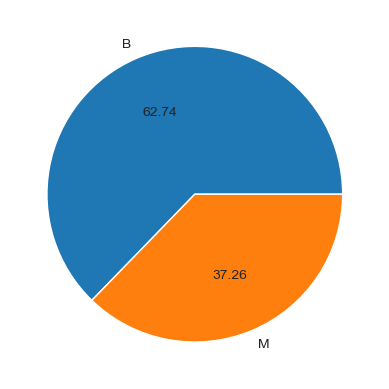

In [12]:
plt.pie(df['diagnosis'].value_counts(), labels=['B', 'M'], autopct="%0.2f")
plt.show()